# heterograph: property maps

Property maps enable attaching arbitrary data to the graph, vertices, and edges. The `HGraph` class provides a `pmap` property for this purpose.

Properties are represented as key-value pairs and stored in a Python dictionary (`dict`) with the following restriction:
* **Keys must be strings, while values can be of any type**.

For this notebook, let us consider the following example.

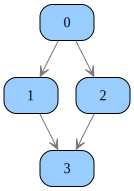

In [1]:
from heterograph import *

g=HGraph()
g.add_vx(4)
g.add_edge(0, [1, 2])
g.add_edge([1, 2], 3)
g.view()

## graph properties

Graph properties store data associated with the entire graph, such as the results of an analysis.

In [2]:
g.pmap # default: no properties

{}

In [3]:
g.pmap = { 'nregions': 3, 'has_cycles': False }
g.pmap['title'] = 'my graph'
g.pmap

{'nregions': 3, 'has_cycles': False, 'title': 'my graph'}

In [4]:
g.pmap['has_cycles']

False

## vertex properties

To access the property map for vertex `vx`, we simply invoke `g.pmap[vx]`. 

In [5]:
g.pmap[0] # default: no properties for vertex 0

{}

In [6]:
g.pmap[0] = {'name': 'vertex-A', 'type': 'square'}
g.pmap[0]['name']

'vertex-A'

In [7]:
g.pmap[0]['type'] = 'circle'
g.pmap[0]['type']

'circle'

## edge properties

To access the property map for edge `(s, t)`, we invoke `g.pmap[(s, t)]`. 

In [8]:
g.pmap[(0, 1)] # default: no properties for edge (0, 1)

{}

In [9]:
g.pmap[(0, 1)] = {'weight': 3.14}

In [10]:
for e in g.edges:
    print(f"edge {e}: {g.pmap[e]}")

edge (0, 1): {'weight': 3.14}
edge (0, 2): {}
edge (1, 3): {}
edge (2, 3): {}


## property map initialization

As shown in previous examples, all property maps start empty. To initialize properties with default key-value pairs, use the `ginit`, `vinit`, and `einit` parameters when building an `HGraph`. These functions are invoked when creating a new graph, vertex, or edge, respectively.

In [11]:
def ginit(g):
    g.pmap = { 'nregions': 0, 'has_cycles': False }
def vinit(g, v):
    g.pmap[v] = { 'name': None, 'type': None }
def einit(g, e):
    g.pmap[e] = { 'weight': None }

g=HGraph(ginit=ginit, vinit=vinit, einit=einit)
g.add_vx(3)
g.add_edge(0, [1, 2])

g.pmap['nregions'] = 3
g.pmap

{'nregions': 3, 'has_cycles': False}

In [12]:
for v in g.vertices:
    print(f"vertex {v}: {g.pmap[v]}")

vertex 0: {'name': None, 'type': None}
vertex 1: {'name': None, 'type': None}
vertex 2: {'name': None, 'type': None}


In [13]:
for e in g.edges:
    print(f"edge {e}: {g.pmap[e]}")

edge (0, 1): {'weight': None}
edge (0, 2): {'weight': None}


In [14]:
# when copying a graph, the property maps and
# initialisation routines are copied as well
h = g.copy()
h.add_vx()
for v in h.vertices:
    print(f"vertex {v}: {h.pmap[v]}")

vertex 0: {'name': None, 'type': None}
vertex 1: {'name': None, 'type': None}
vertex 2: {'name': None, 'type': None}
vertex 3: {'name': None, 'type': None}
